In [14]:
import wave
import contextlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import librosa.display
from scipy.signal import stft
%matplotlib inline  


path = 'C://Users//Muhammad//Desktop//Sound Recognition//Summer Research Prep Work//Background Material//Lecture 4 - Signal Processing Part III//Assignment//speech_file_1.wav'

freq, sig = wav.read(path)
sig.dtype

dtype('int16')

In [6]:
nframes = sig.size
length = nframes/freq
time_vec, spacing = np.linspace(0, length, num = nframes, retstep = True)
fft_sig = np.fft.fft(sig)

In [7]:
# will be 16 kHz as expected
freq

16000

In [9]:
rate, data = wav.read(path, mmap = False)

In [10]:
wav = wave.open(path)

rate = wav.getframerate()
nchannels = wav.getnchannels()
sampwidth = wav.getsampwidth()
nframes = wav.getnframes()
# data = wav.readframes(nframes)
wav.close()
print('Rate:', rate,
      'Number of channels:', nchannels, 
      'Sample width:', sampwidth, 
      'Number of frames:', nframes)


# prints length of file in seconds
with contextlib.closing(wave.open(path,'r')) as f: 
    frames = f.getnframes()
    rate = f.getframerate()
    length = frames / float(rate)    
    print('Length of file:', length)

Rate: 16000 Number of channels: 1 Sample width: 2 Number of frames: 48941
Length of file: 3.0588125


In [11]:
import winsound

winsound.PlaySound(path, winsound.SND_FILENAME)

Text(0.5, 0, 'Time (ms)')

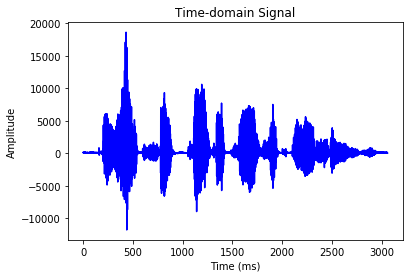

In [12]:
# plotting the tone

timeArray = np.arange(0, 48941, 1)
timeArray = timeArray / sampFreq
timeArray = timeArray * 1000  #scale to milliseconds

plt.plot(timeArray, snd, color = 'b')
plt.title('Time-domain Signal') 
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')

In [15]:
mag_spec = np.abs(fft_sig)
mag_spec[2:-2] = 2*mag_spec[2:-2]
freqs = freq*np.linspace(0, nframes//2, num=nframes//2)
phase_spec = np.angle(fft_sig)

sample_frequencies, segment_time, stft_sig = stft(sig)
print("f:",np.shape(sample_frequencies),
      "t",np.shape(segment_time),
      "stft", np.shape(stft_sig))

f: (129,) t (384,) stft (129, 384)


Text(0.5, 0, 'Frequency (Hz)')

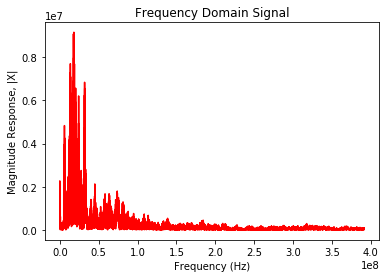

In [16]:
plt.plot(freqs[1:nframes//2], mag_spec[1:nframes//2], 'r')
plt.title('Frequency Domain Signal') 
plt.ylabel('Magnitude Response, |X|')
plt.xlabel('Frequency (Hz)')

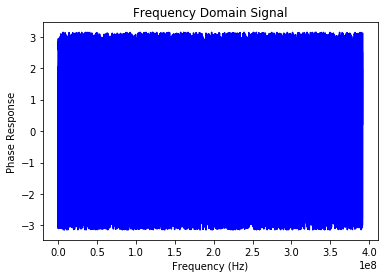

In [18]:
plt.plot(freqs[1:], phase_spec[1:nframes//2], 'b')
plt.title('Frequency Domain Signal') 
plt.ylabel('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.show() 

Text(17.625, 0.5, 'Frequency')

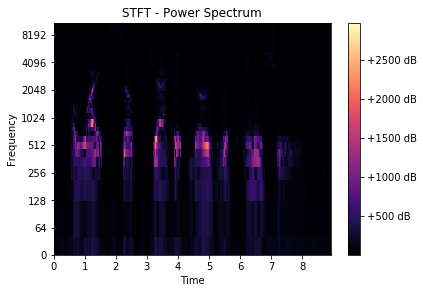

In [21]:
librosa.display.specshow(stft_sig, y_axis = "log", x_axis = "time")
plt.colorbar(format = "%+2.0f dB")
plt.tight_layout()
plt.title("STFT - Power Spectrum")
plt.xlabel("Time")
plt.ylabel("Frequency")

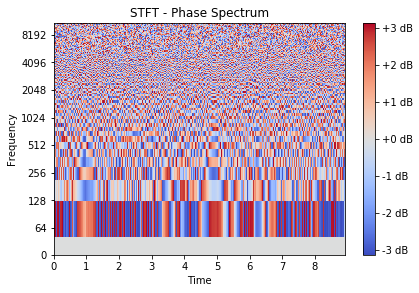

In [22]:
librosa.display.specshow(np.angle(stft_sig), y_axis = "log", x_axis = "time")
plt.colorbar(format = "%+2.0f dB")
plt.tight_layout()
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("STFT - Phase Spectrum")
plt.show()